In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [62]:
pha_df = pd.read_csv('NEO_Asteroids_with_defined_H_and_MOID.csv')
pha_df.head()

,id,H,epoch_mjd,n,moid,sigma_n,rms,pha
0,a0000433,10.4,59000,0.559819,0.148623,5.560000e-11,0.27423,0
1,a0000719,15.4,59000,0.229955,0.203482,3.310000e-10,0.39148,0
2,a0000887,13.8,59000,0.253323,0.082217,1.050000e-09,0.49954,0
3,a0001036,9.4,59000,0.226582,0.344956,3.080000e-10,0.38187,0
4,a0001221,17.7,59000,0.370615,0.107451,2.960000e-10,0.45943,0


In [63]:
pha_df.shape

(23054, 8)

In [64]:
pha_df['pha'].value_counts()

0    20976
1     2078
Name: pha, dtype: int64

In [66]:
X = pha_df[['H', 'n','moid', 'rms']].values  #.astype(float)
X[0:5]

array([[10.4 ,  0.56,  0.15,  0.27],
       [15.4 ,  0.23,  0.2 ,  0.39],
       [13.8 ,  0.25,  0.08,  0.5 ],
       [ 9.4 ,  0.23,  0.34,  0.38],
       [17.7 ,  0.37,  0.11,  0.46]])

In [12]:
y = pha_df['pha'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-4.18643001,  0.14617892,  0.54336527, -0.01831297],
       [-2.50829064, -1.02847244,  1.08139655, -0.01168533],
       [-3.04529524, -0.94526085, -0.10791357, -0.00557716],
       [-4.52205788, -1.04048417,  2.46890704, -0.01222854],
       [-1.73634653, -0.52758104,  0.13956964, -0.0078444 ]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (18443, 4) (18443,)
Test set: (4611, 4) (4611,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [51]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9940356774928157
Test set Accuracy:  0.9921925829538061


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 380   17]
 [  19 4195]]


Confusion matrix, without normalization
[[ 380   17]
 [  19 4195]]


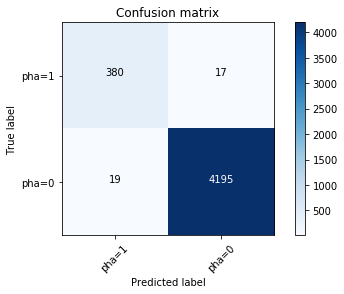

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['pha=1','pha=0'],normalize= False,  title='Confusion matrix')

In [54]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       0.95      0.96      0.95       397

    accuracy                           0.99      4611
   macro avg       0.97      0.98      0.98      4611
weighted avg       0.99      0.99      0.99      4611



In [55]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99])

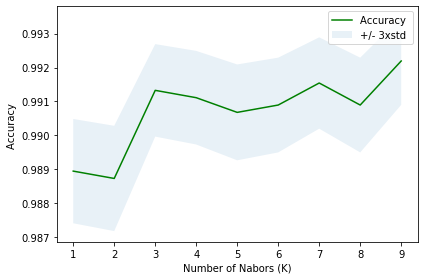

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9921925829538061 with k= 9
